<a href="https://colab.research.google.com/github/charlie-aashutosh/NOKIA-Code_files/blob/main/Linear_Regression%26KNN_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 1 : Gathering the data

In [42]:
#load and read the dataset
df=pd.read_csv("/content/Quality of Service 5G (1).csv")

In [43]:
#showing the first 10 records of the dataset
df.head(10)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
5,9/3/2023 10:00,User_6,Background_Download,-90 dBm,50 ms,500 Kbps,550 Kbps,70%
6,9/3/2023 10:00,User_7,Web_Browsing,-88 dBm,30 ms,1 Mbps,1 Mbps,60%
7,9/3/2023 10:00,User_8,IoT_Temperature,-95 dBm,100 ms,10 Kbps,15 Kbps,50%
8,9/3/2023 10:00,User_9,Video_Streaming,-82 dBm,35 ms,3 Mbps,3.5 Mbps,80%
9,9/3/2023 10:00,User_10,File_Download,-75 dBm,45 ms,2 Mbps,2 Mbps,70%


Step 2 : Data preprocessing

In [44]:
#basic information related to the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [45]:
#checking for missing values
df.isnull().sum()

,0
Timestamp,0
User_ID,0
Application_Type,0
Signal_Strength,0
Latency,0
Required_Bandwidth,0
Allocated_Bandwidth,0
Resource_Allocation,0


In [46]:
#converting timestamp from object to datetime format
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [47]:
df['Timestamp'].head()

,Timestamp
0,2023-09-03 10:00:00
1,2023-09-03 10:00:00
2,2023-09-03 10:00:00
3,2023-09-03 10:00:00
4,2023-09-03 10:00:00


In [48]:
#extracting time from datetime
df['Hour']=df['Timestamp'].dt.hour

In [49]:
df['Hour'].head()

,Hour
0,10
1,10
2,10
3,10
4,10


In [50]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Hour
0,2023-09-03 10:00:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%,10
1,2023-09-03 10:00:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%,10
2,2023-09-03 10:00:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%,10
3,2023-09-03 10:00:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%,10
4,2023-09-03 10:00:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%,10


In [51]:
#converting categorical columns into numeric columns - either by one-hot-encoding or by label encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [52]:
le=LabelEncoder()

In [53]:
df['Application_Type']=le.fit_transform(df['Application_Type'])
df['Signal_Strength']=df['Signal_Strength'].str.replace('dBm','').astype(int)

In [54]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Hour
0,2023-09-03 10:00:00,User_1,6,-75,30 ms,10 Mbps,15 Mbps,70%,10
1,2023-09-03 10:00:00,User_2,9,-80,20 ms,100 Kbps,120 Kbps,80%,10
2,2023-09-03 10:00:00,User_3,5,-85,40 ms,5 Mbps,6 Mbps,75%,10
3,2023-09-03 10:00:00,User_4,1,-70,10 ms,1 Mbps,1.5 Mbps,90%,10
4,2023-09-03 10:00:00,User_5,4,-78,25 ms,2 Mbps,3 Mbps,85%,10


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   User_ID              400 non-null    object        
 2   Application_Type     400 non-null    int64         
 3   Signal_Strength      400 non-null    int64         
 4   Latency              400 non-null    object        
 5   Required_Bandwidth   400 non-null    object        
 6   Allocated_Bandwidth  400 non-null    object        
 7   Resource_Allocation  400 non-null    object        
 8   Hour                 400 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 26.7+ KB


In [56]:
df['Latency']=df['Latency'].str.replace('ms','').astype(int)

In [57]:
def mbps(value):
  if 'Kbps' in value:
    return float(value.replace('Kbps',''))/1000
  else:
    return float(value.replace('Mbps',''))

df['Required_Bandwidth']=df['Required_Bandwidth'].apply(mbps)
df['Allocated_Bandwidth']=df['Allocated_Bandwidth'].apply(mbps)

In [58]:
df['User_ID']=le.fit_transform(df['User_ID'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   User_ID              400 non-null    int64         
 2   Application_Type     400 non-null    int64         
 3   Signal_Strength      400 non-null    int64         
 4   Latency              400 non-null    int64         
 5   Required_Bandwidth   400 non-null    float64       
 6   Allocated_Bandwidth  400 non-null    float64       
 7   Resource_Allocation  400 non-null    object        
 8   Hour                 400 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(1)
memory usage: 26.7+ KB


In [60]:
df['Resource_Allocation']=df['Resource_Allocation'].str.replace('%','').astype(int)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   User_ID              400 non-null    int64         
 2   Application_Type     400 non-null    int64         
 3   Signal_Strength      400 non-null    int64         
 4   Latency              400 non-null    int64         
 5   Required_Bandwidth   400 non-null    float64       
 6   Allocated_Bandwidth  400 non-null    float64       
 7   Resource_Allocation  400 non-null    int64         
 8   Hour                 400 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5)
memory usage: 26.7 KB


Step 3 : Dividing the data into dependent (y) and independent (x) columns

In [62]:
x=df[['Hour','User_ID','Application_Type','Signal_Strength','Latency','Required_Bandwidth','Resource_Allocation']]
y=df['Allocated_Bandwidth']

In [63]:
x.head()

,Hour,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Resource_Allocation
0,10,0,6,-75,30,10.0,70
1,10,111,9,-80,20,0.1,80
2,10,222,5,-85,40,5.0,75
3,10,333,1,-70,10,1.0,90
4,10,345,4,-78,25,2.0,85


Step 4 : Split the data into training and testing set

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=60) #90% data used for training the model

Step 5 : Choosing LinearRegression algorithm for creating our SMLM

In [65]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [66]:
model.fit(x_train,y_train)

LinearRegression()

In [67]:
predictions=model.predict(x_test)

Step 6 : Performance evaluation

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
mse=mean_squared_error(y_test,predictions)
r2=r2_score(y_test,predictions)

In [70]:
print(mse)

0.1631634555974997


In [71]:
print(r2) #overfitting situation

0.99170075490498


Text(0, 0.5, 'Actual vs Predicted bandwidth')

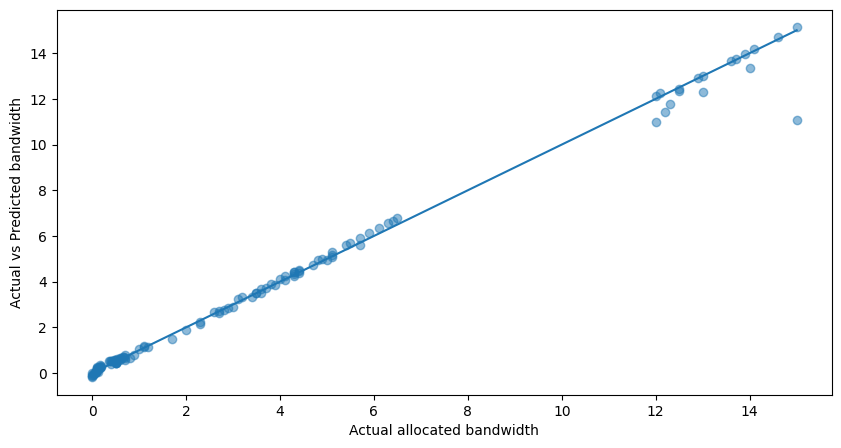

In [72]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,predictions,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()])
plt.xlabel("Actual allocated bandwidth")
plt.ylabel("Actual vs Predicted bandwidth")

Now we will create a new SMLM using KNN Regressor and we will then evaluate the performance with that of Linear Regression

In [74]:
#importing KNN algorithm
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

In [75]:
#training the model
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [76]:
#predicting new values from the model
new_model_predictions=knr.predict(x_test)

In [77]:
#checking the performance
mse=mean_squared_error(y_test,new_model_predictions)
r2=r2_score(y_test,new_model_predictions)

In [78]:
print(mse)

10.512453554999999


In [79]:
print(r2)

0.4652881781433862
